# Task 1: Exploratory Data Analysis

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Data preparation 

In [2]:
anz = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
anz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

Columns 'status', 'account','currecy','long_lat','txn_description','first_name', 'balance', 'date', 'gender', 'age', 'extraction', 'amount', 'transaction_id', 'country', 'customer_id', 'movement' contain no missing values!

In [4]:
np.unique(anz['merchant_code'])

array([ 0., nan, nan, ..., nan, nan, nan])

The merchant_code just has '0' and 'nan' values, which do not make much sense.

May be we can find the merchant_long_lat, merchant_suburb, and merchant_state from the merchant_id if they are not missing. Let's check!

In [5]:
#Create bool series True for NaN values
bool_series = pd.isnull(anz['merchant_long_lat'])

#Display data only with merchant_long_lat = NaN
anz[bool_series].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4326 entries, 5 to 12037
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             4326 non-null   object        
 1   card_present_flag  0 non-null      float64       
 2   bpay_biller_code   883 non-null    object        
 3   account            4326 non-null   object        
 4   currency           4326 non-null   object        
 5   long_lat           4326 non-null   object        
 6   txn_description    4326 non-null   object        
 7   merchant_id        0 non-null      object        
 8   merchant_code      883 non-null    float64       
 9   first_name         4326 non-null   object        
 10  balance            4326 non-null   float64       
 11  date               4326 non-null   datetime64[ns]
 12  gender             4326 non-null   object        
 13  age                4326 non-null   int64         
 14  merchan

Records with missing merchant_surburb, merchant_state, and merchant_long_lat are also missing merchant_id. So can not use merchant_id to get info about merchant_surburb, merchant_state, and merchant_long_lat.

In [6]:
#Check unique value
column_check = ['country','currency','merchant_id','transaction_id']
for column in column_check:
    print("No of unique values in column '" + column + "' are: " + str(len(Counter(anz[column]))))

No of unique values in column 'country' are: 1
No of unique values in column 'currency' are: 1
No of unique values in column 'merchant_id' are: 5726
No of unique values in column 'transaction_id' are: 12043


'currency' and 'country' columns have only 1 unique value, so it is useless to analyse this attribute. Besides, it is hard to perform any analysis on 'merchant_id', 'transaction_id', and 'merchant_code'. So these columns will be dropped!

In [7]:
anz.drop(['country','currency','merchant_id','transaction_id','merchant_code'],axis = 1, inplace = True)
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int64         
 11  merchant_suburb    7717 non-null   object        
 12  merchant_state     7717 non-null   object        
 13  extraction         12043 non-null  object        
 14  amount

In [8]:
anz.drop_duplicates(inplace = True)
anz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int64         
 11  merchant_suburb    7717 non-null   object        
 12  merchant_state     7717 non-null   object        
 13  extraction         12043 non-null  object        
 14  amount

No duplicates!

In [9]:
anz.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


The maximum balance and amount are outstanding. Let's take a look!

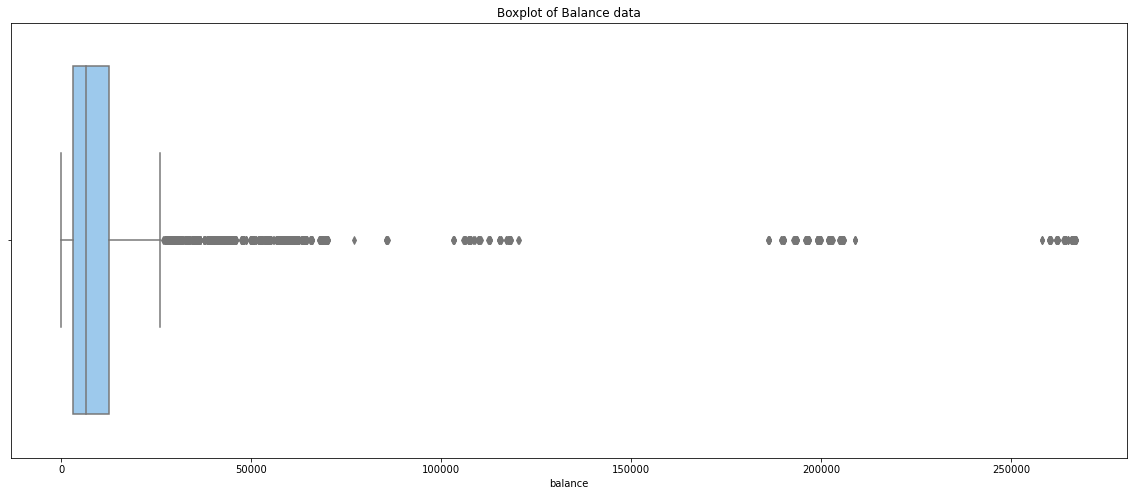

In [10]:
plt.figure(figsize=(20,8))
sns.boxplot(x = anz["balance"], color = '#90caf9')
plt.title('Boxplot of Balance data')
plt.show()

In [11]:
np.unique(anz[anz.balance >= 250000]['account'])

array(['ACC-2014856841'], dtype=object)

There is only 1 account with balance > 250000 AUD but this account performs multiple transactions so it will be kept for further analysis

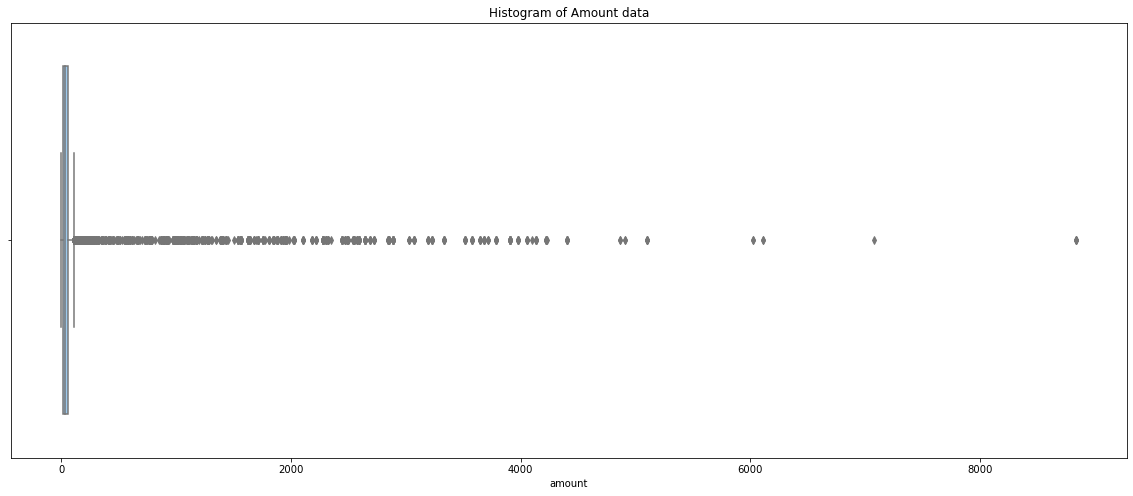

In [12]:
plt.figure(figsize=(20,8))
sns.boxplot(x = anz["amount"],color = '#90caf9')
plt.title('Histogram of Amount data')
plt.show()

In [13]:
anz[anz.amount >= 8000]

,status,card_present_flag,bpay_biller_code,account,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
2401,posted,NaN,0,ACC-1523339231,115.83 -31.90,PAY/SALARY,Tim,62647.22,2018-08-20,M,40,NaN,NaN,2018-08-20T13:00:00.000+0000,8835.98,CUS-1816693151,NaN,credit
6529,posted,NaN,0,ACC-1523339231,115.83 -31.90,PAY/SALARY,Tim,70242.78,2018-09-20,M,40,NaN,NaN,2018-09-20T13:00:00.000+0000,8835.98,CUS-1816693151,NaN,credit
10429,posted,NaN,0,ACC-1523339231,115.83 -31.90,PAY/SALARY,Tim,77054.31,2018-10-19,M,40,NaN,NaN,2018-10-19T13:00:00.000+0000,8835.98,CUS-1816693151,NaN,credit
10430,posted,NaN,0,ACC-1523339231,115.83 -31.90,PAY/SALARY,Tim,85890.29,2018-10-19,M,40,NaN,NaN,2018-10-19T13:00:00.000+0000,8835.98,CUS-1816693151,NaN,credit


There are 4 transactions with the same amount 8835.98 AUD from the same account in the same hour 13:00:00. These transactions look abnormal, so there should be further measures to investigate this case.

At present, I will remove these transactions avoid the effect of these outliers.

In [14]:
anz = anz[anz.amount <= 8000]
anz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12039 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12039 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   881 non-null    object        
 3   account            12039 non-null  object        
 4   long_lat           12039 non-null  object        
 5   txn_description    12039 non-null  object        
 6   first_name         12039 non-null  object        
 7   balance            12039 non-null  float64       
 8   date               12039 non-null  datetime64[ns]
 9   gender             12039 non-null  object        
 10  age                12039 non-null  int64         
 11  merchant_suburb    7717 non-null   object        
 12  merchant_state     7717 non-null   object        
 13  extraction         12039 non-null  object        
 14  amount

In [17]:
#Check unique values of categorical attributes
column_check = ['status','gender','merchant_state','movement']
for column in column_check:
    print("Unique values in column '" + column + "' are: " + str(Counter(anz[column]).keys()))

Unique values in column 'status' are: dict_keys(['authorized', 'posted'])
Unique values in column 'gender' are: dict_keys(['F', 'M'])
Unique values in column 'merchant_state' are: dict_keys(['QLD', 'NSW', nan, 'VIC', 'WA', 'SA', 'NT', 'TAS', 'ACT'])
Unique values in column 'movement' are: dict_keys(['debit', 'credit'])


It looks all good!

In [18]:
#Split long_lat attribute into 'long' and 'lat' columns for further visualization
location = anz['long_lat']
anz[['long','lat']] = location.str.split(" ", n=1, expand = True)
anz.head()

,status,card_present_flag,bpay_biller_code,account,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement,long,lat
0,authorized,1.0,NaN,ACC-1598451071,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95
1,authorized,0.0,NaN,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95
2,authorized,1.0,NaN,ACC-1222300524,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94
3,authorized,1.0,NaN,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66
4,authorized,1.0,NaN,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95


In [19]:
anz.drop('long_lat', axis = 1, inplace = True)

In [20]:
#Split the merchant_long_lat into 2 seprate columns
merchant_location = anz['merchant_long_lat']
anz[['merchant_long','merchant_lat']] = merchant_location.str.split(" ", n=1, expand = True)
anz.head()

,status,card_present_flag,bpay_biller_code,account,txn_description,first_name,balance,date,gender,age,...,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement,long,lat,merchant_long,merchant_lat
0,authorized,1.0,NaN,ACC-1598451071,POS,Diana,35.39,2018-08-01,F,26,...,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,153.38,-27.99
1,authorized,0.0,NaN,ACC-1598451071,SALES-POS,Diana,21.20,2018-08-01,F,26,...,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,151.21,-33.87
2,authorized,1.0,NaN,ACC-1222300524,POS,Michael,5.71,2018-08-01,M,38,...,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,151.21,-33.87
3,authorized,1.0,NaN,ACC-1037050564,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,...,QLD,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,153.05,-26.68
4,authorized,1.0,NaN,ACC-1598451071,SALES-POS,Diana,17.95,2018-08-01,F,26,...,QLD,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,153.44,-28.06


In [21]:
anz.drop('merchant_long_lat',axis = 1, inplace = True)

## Data Analysis

### What is the average transaction amount? 

In [22]:
anz.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12039.000000,12039.000000,12039.000000
mean,0.802644,14684.508053,30.579201,185.060244
std,0.398029,31490.043985,10.046545,571.342488
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3157.965000,22.000000,16.000000
50%,1.000000,6425.540000,28.000000,29.000000
75%,1.000000,12461.080000,38.000000,53.550000
max,1.000000,267128.520000,78.000000,7081.090000


The average transaction amount is about $185. About 75% of all transactions are performed with an amount of less than about $53. However, due to some high amount transactions, the average transaction amount become large.

<function matplotlib.pyplot.show(close=None, block=None)>

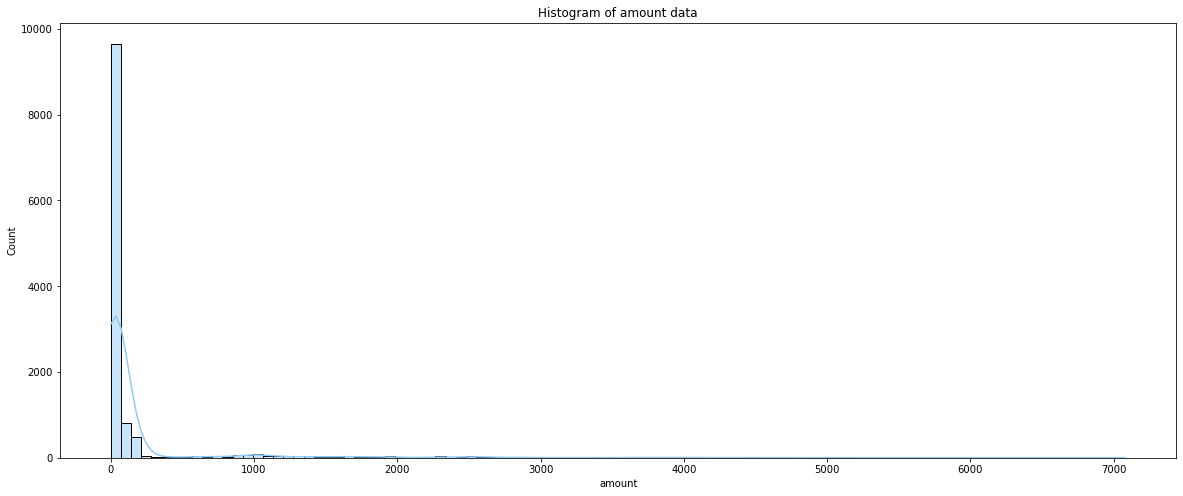

In [34]:
plt.figure(figsize = (20,8))
sns.histplot(data=anz, x="amount", bins=100, kde = True, color = '#90caf9')
plt.title('Histogram of amount data')
plt.show

The amount transaction is highly skewed

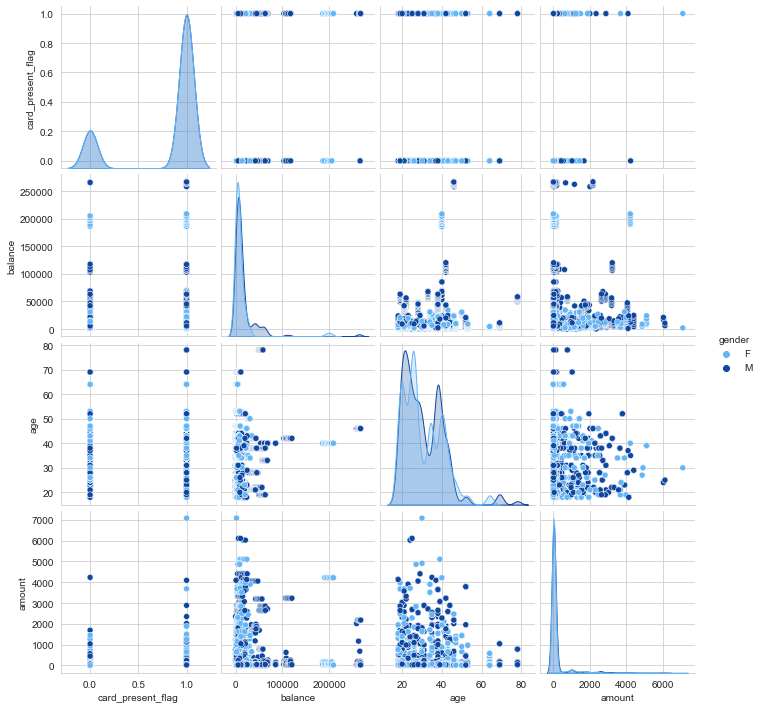

In [67]:
sns.pairplot(anz, hue="gender", palette = ["#64b5f6","#0d47a1"])

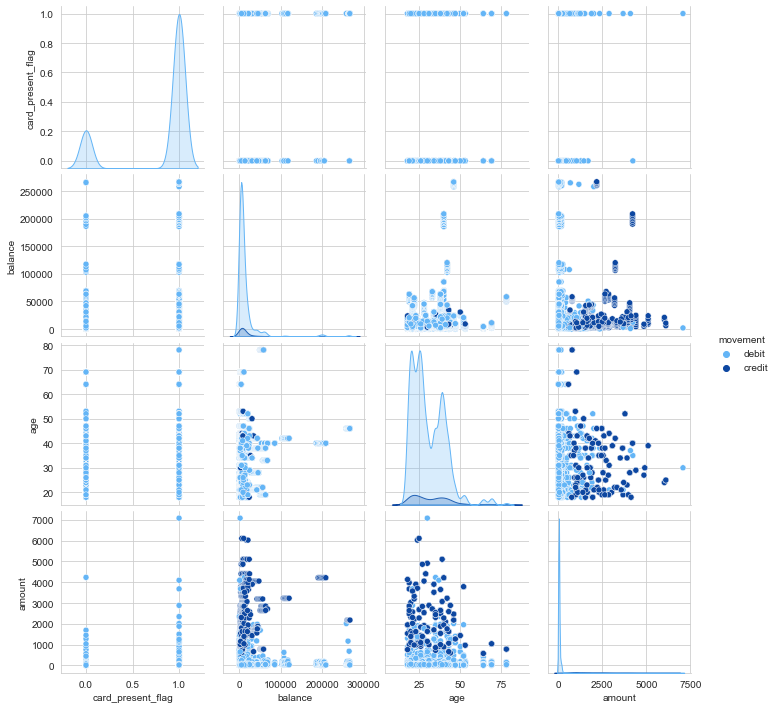

In [68]:
sns.pairplot(anz, hue="movement", palette = ["#64b5f6","#0d47a1"])

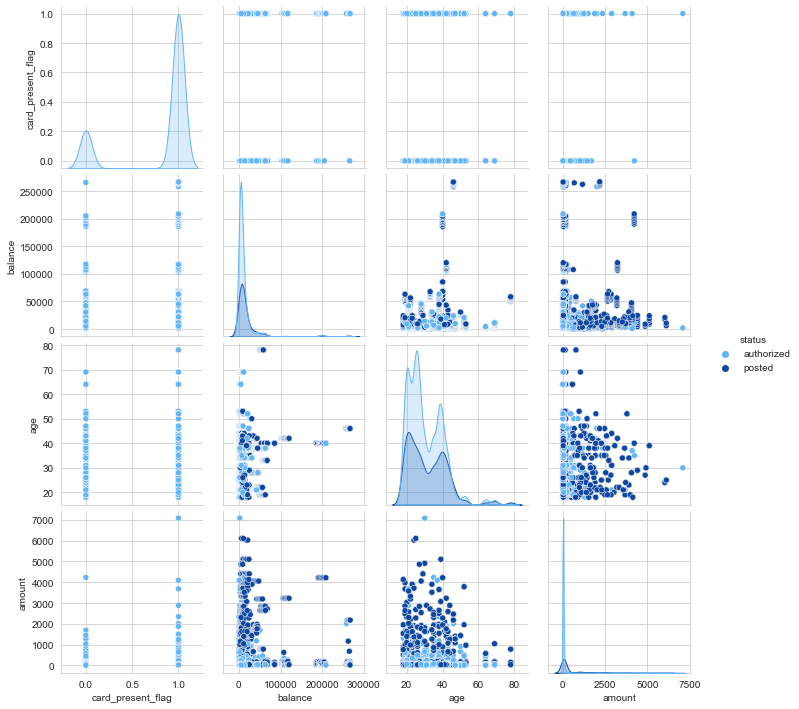

In [69]:
sns.pairplot(anz, hue="status", palette = ["#64b5f6","#0d47a1"])

### Any relationships between balance and amount? 

In [55]:
sns.set_style("whitegrid")
my_palette = ["#0d47a1", "#1976d2","#2196f3","#64b5f6","#bbdefb","#e3f2fd"]
sns.set_palette(my_palette)

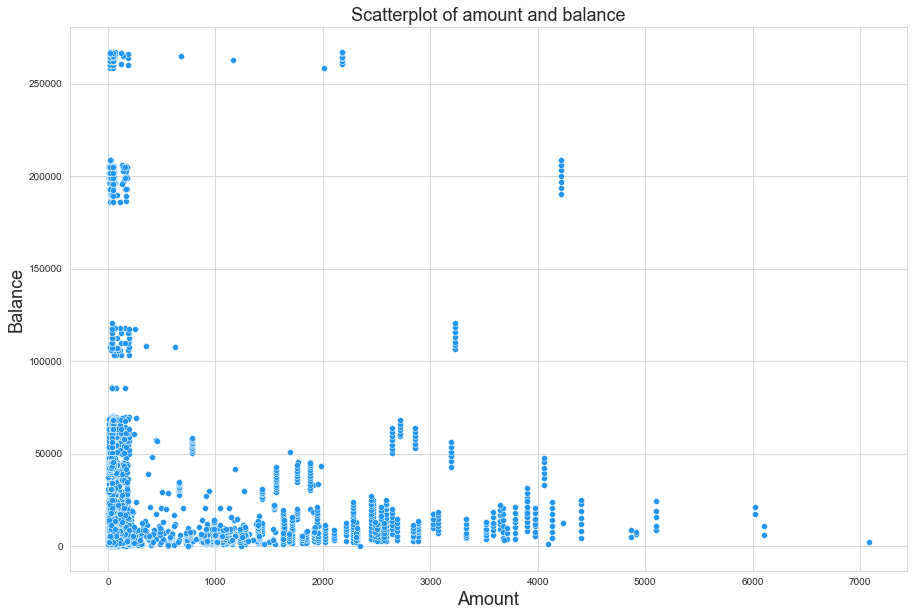

In [39]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=anz, x="amount", y="balance", color = "#2196f3")
plt.title("Scatterplot of amount and balance", fontsize = 18)
plt.ylabel("Balance",fontsize=18)
plt.xlabel("Amount",fontsize=18)
plt.show()

It seems so particular relationship between amount and balance in general.

### Any relationship between age and amount? 

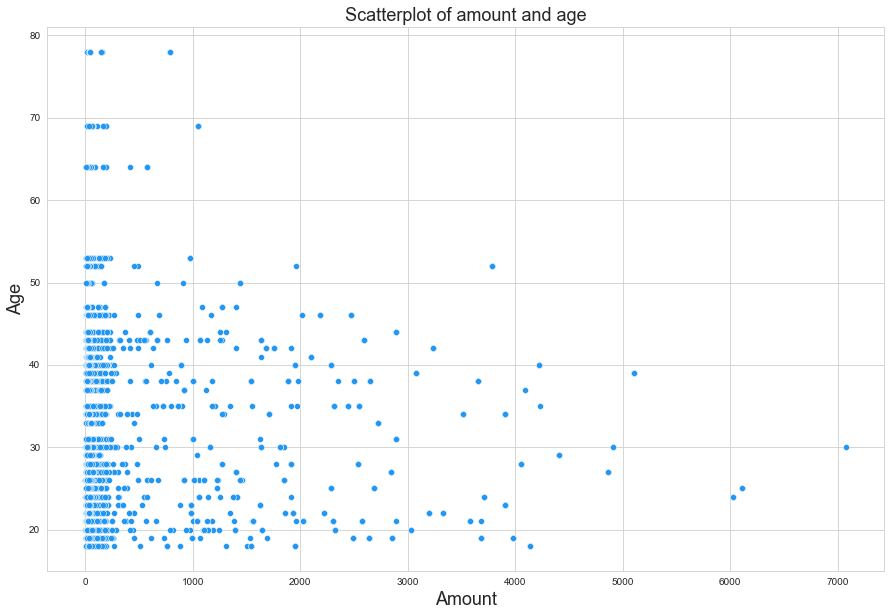

In [52]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=anz, x="amount", y="age",color = "#2196f3")
plt.title("Scatterplot of amount and age", fontsize = 18)
plt.ylabel("Age",fontsize=18)
plt.xlabel("Amount",fontsize=18)
plt.show()

In [49]:
bins = [0,19,29,39,49,59,80]
age_bins = ["0-20","20-30","30-40","40-50","50-60","60+"]
anz['age_bin'] = pd.cut(anz["age"], bins, labels = age_bins)


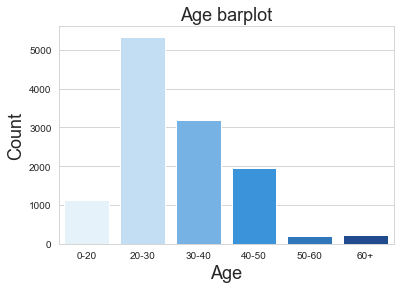

In [51]:
sns.countplot(x="age_bin",data=anz,palette = my_palette)
plt.title("Age barplot", fontsize = 18)
plt.ylabel("Count",fontsize=18)
plt.xlabel("Age",fontsize=18)
plt.show()

Most of our customer are from 20 to 40 years old.

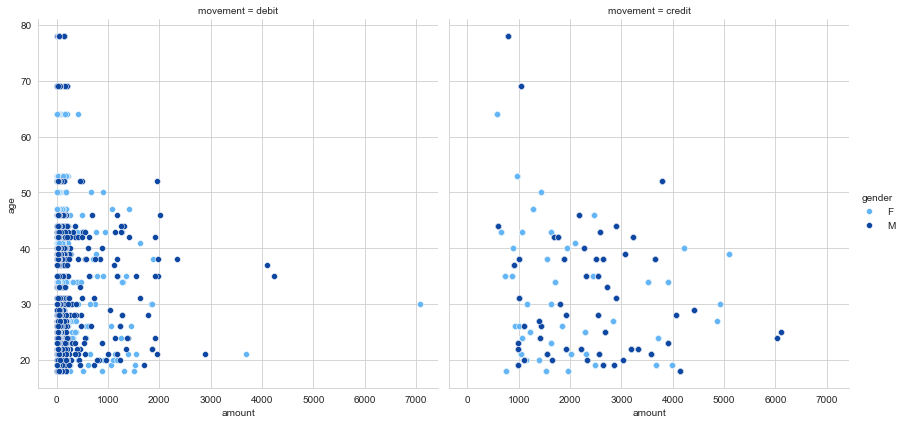

In [65]:
g = sns.FacetGrid(anz, col = "movement", hue = "gender",height=6, aspect= 1, palette = ["#64b5f6","#0d47a1"])
g.map_dataframe(sns.scatterplot, x='amount', y = 'age')
g.add_legend()